In [13]:
import random
import xml.etree.ElementTree as et
from common import *
import random

loc = "level2/POL0001_balucki_bialy-murzyn.xml"
words = get_words(loc)
pos_set = list(set([w.attrib['pos'] for w in words]))
pos = random.choices(pos_set, k=3)
words_by_pos = [[w.text for w in words if w.attrib['pos'] == p] for p in pos]
words_by_pos = {p: w for p, w in zip(pos, words_by_pos)}

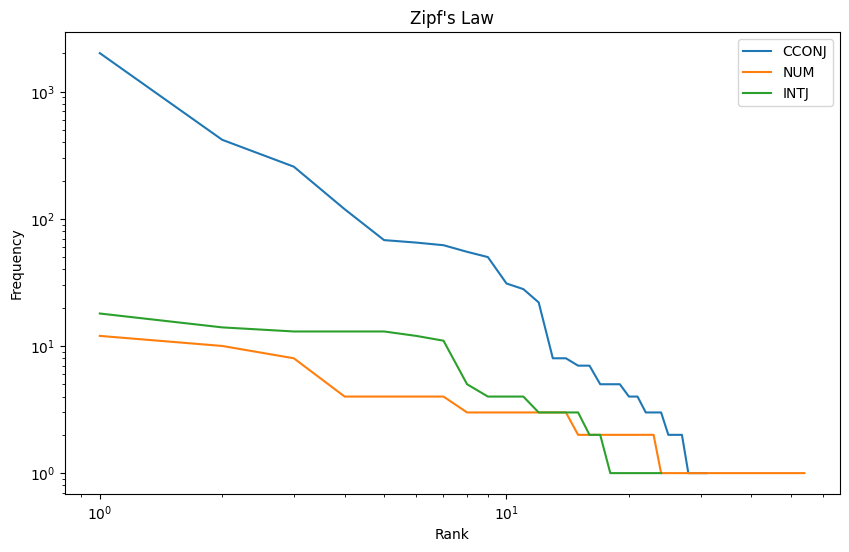

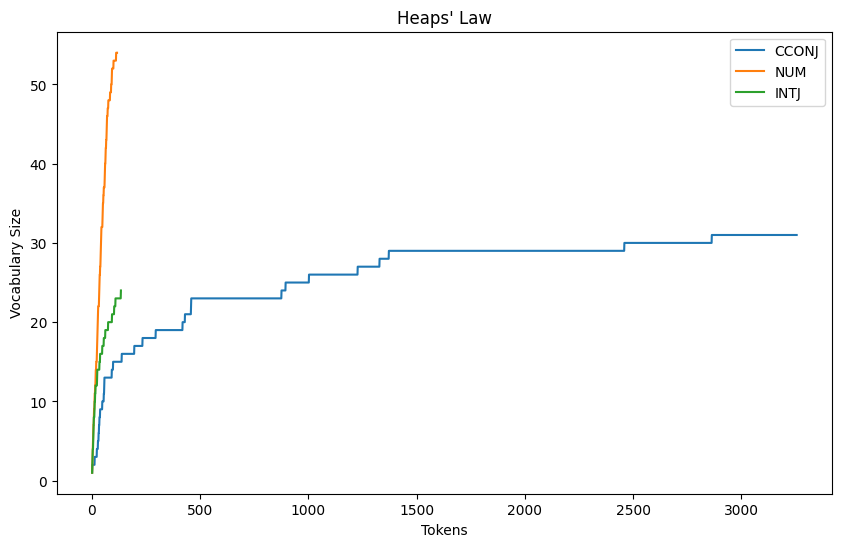

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

def zipf_analysis(words_by_pos):
    plt.figure(figsize=(10, 6))
    for pos, words in words_by_pos.items():
        freq = Counter(words)
        ranks = range(1, len(freq) + 1)
        frequencies = sorted(freq.values(), reverse=True)
        plt.loglog(ranks, frequencies, label=pos)
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Zipf\'s Law')
    plt.legend()
    plt.show()

def heaps_analysis(words_by_pos):
    plt.figure(figsize=(10, 6))
    for pos, words in words_by_pos.items():
        unique_words = set()
        vocab_size = []
        tokens = 0
        for word in words:
            tokens += 1
            unique_words.add(word)
            vocab_size.append(len(unique_words))
        plt.plot(range(1, tokens + 1), vocab_size, label=pos)
    plt.xlabel('Tokens')
    plt.ylabel('Vocabulary Size')
    plt.title('Heaps\' Law')
    plt.legend()
    plt.show()

zipf_analysis(words_by_pos)
heaps_analysis(words_by_pos)
